## Lab Text Analysis

We will start by creaitng a pipeline which allows us to group the lab data into the amounts of thc or age.

In [1]:
study_data = {}

In [2]:
old_placebo = []
young_placebo = []
old_thc = []
young_thc = []

In [3]:
import os
import spacy
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import TfidfModel



In [4]:
errors = []

In [5]:
old_7_5 = []
old_15 = []
young_7_5 = []
young_15 = []

In [6]:
for filename in os.listdir("ART text/"):
    try:
        group, rest = filename.split("_ART")
        junk, amount = rest.split("_")
        texts = []
        
        for line in open("ART text/" + filename):
            texts.append(line.replace("\\", "").replace("\n", "").replace("f1", "").replace("\\i", "").replace("f0", "").strip())
        
        study_data[filename.split(".txt")[0]] = texts
        
        if group.lower() == "young":
            if "0mg" in amount:
                young_placebo.append(texts)
            else:
                young_thc.append(texts)
                if "7.5mg" in amount:
                    young_7_5.append(texts)
                if "15mg" in amount:
                    young_15.append(texts)
        if group.lower() == "old":
            if "0mg" in amount:
                old_placebo.append(texts)
            else:
                old_thc.append(texts)
                if "7.5mg" in amount:
                    old_7_5.append(texts)
                if "15mg" in amount:
                    old_15.append(texts)
        print(group, amount)
    except ValueError:
        errors.append(filename)
        print(filename)

YOUNG 7.5mgTHC.txt
YOUNG 7.5mgTHC.txt
OLD 7.5mgTHC.txt
Young 15mg.txt
YOUNG 7.5mgTHC.txt
YOUNG 15mgTHC.txt
OLD 15mgTHC.txt
YOUNG_ART005.1_15mgTHC_DROPPEDafterfirstsession.txt
OLD 0mgTHC.txt
Old 15mg.txt
OLD 0mgTHC.txt
Young 15mg.txt
OLD 7.5mg.rtf
.DS_Store
Old 0mg.txt
Young 0mg.txt
YOUNG 15mgTHC.txt
OLD 15mgTHC.txt
Old 0mg.txt
YOUNG 0mgTHC.txt
ART Speech
OLD 0mgTHC.txt
Old 15mg.txt
YOUNG 7.5mg.rtf
OLD 0mgTHC.txt
YOUNG 0mgTHC.txt
OLD 0mgTHC.txt
OLD 0mgTHC.txt
OLD 7.5mgTHC.txt
YOUNG 15mgTHC.txt
YOUNG 0mg.rtf
OLD 7.5mgTHC.txt
YOUNG 15mgTHC.txt
Young 7.5mg.txt
OLD 15mgTHC.txt
OLD 0mg.rtf
YOUNG 7.5mgTHC.txt
Young 0mg.txt
Old 7.5mg.txt
YOUNG 7.5mgTHC.txt
YOUNG 7.5mgTHC.txt
Old 0mg.txt
YOUNG_ART016.2_15mgTHC_ButDrugOnsetLate.txt
OLD 7.5mgTHC.txt
OLD 15mgTHC.txt
YOUNG 0mgTHC.txt
OLD 15mgTHC.txt
OLD 15mgTHC.txt
OLD 15mgTHC.txt
YOUNG 15mgTHC.txt
OLD 7.5mgTHC.txt
YOUNG 7.5mgTHC.txt
YOUNG 0mgTHC.txt
Old 15mg.txt
YOUNG 15mgTHC.txt
OLD 7.5mgTHC.txt
YOUNG 15mgTHC.txt
Old 7.5mg.txt
OLD 7.5mgTHC.txt
YO

In [7]:
errors

['YOUNG_ART005.1_15mgTHC_DROPPEDafterfirstsession.txt',
 '.DS_Store',
 'ART Speech',
 'YOUNG_ART016.2_15mgTHC_ButDrugOnsetLate.txt']

In [8]:
len(young_placebo), len(old_placebo), len(young_thc), len(old_thc)

(13, 13, 25, 26)

In [9]:
len(young_7_5), len(young_15), len(old_7_5), len(old_15)

(13, 12, 13, 13)

In [10]:
young_placebo

[['I feel fine right now.',
  "I'm not sure if it's because I got a placebo or the effects haven't hit me yet.",
  "I'm kind of anxious to see if I will start feeling anything soon, but I hope I don't.",
  ''],
 ['Not really feeling anything out of the norm.',
  'Zoning out, could be out of boredom.',
  'Hungry, drowsy.'],
 ['I feel dreamy, appreciate music, less tingly, hungry, dry mouth, difficult to focus.',
  'Lack of sleep plus placebo? might explain things.',
  "Bit of a veil, not on one's experience.",
  "If I'm on placebo, sorry for being this way."],
 ['I am feeling fairy close to a normal state.',
  'I tend to be fairly energetic and anxious so this degree ion calm is greatly abnormal to me. That said, it may also just Abe a result of having some time to myself in a quit room.',
  'As far as physiological sensations, my',
  'i illegible illegible',
  'i0  a bit easier and my limbs feel slightly heavy.',
  "I can't tell if I'm just looking to sensations, but I'm moving with a 

In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
import operator

In [13]:
stop_words = ["uh", "oh", "um", "like", "thing", "yeah"]

In [29]:
def clean_texts(texts):
    cleaned_texts = []
    cleaned_text = []
    
    for text in texts:
        doc = nlp(text.lower())
        for w in doc:
            # if it's not a stop word or punctuation mark, add it to our article!
            if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and w.text != 'I':
                # we add the lematized version of the word
                word = str(w).strip()
                # do we want = > <
                if word != '' and word != '=' and word != ">" and word != "<" and word not in stop_words:
                    cleaned_text.append(word)
        cleaned_texts.append(cleaned_text)
        cleaned_text = []
        
    bigram = gensim.models.Phrases(cleaned_texts)
    cleaned_texts = [bigram[line] for line in cleaned_texts]
    cleaned_words = []
    for text in cleaned_texts:
        for word in text:
            cleaned_words.append(word)
    return cleaned_words

In [30]:
def text_summaries(texts):
    total_docs = len(texts)
    avg_len = 0
    for text in texts:
        avg_len += len(text)
    avg_len /= total_docs
    
    cleaned_texts = []
    for text in texts:
        cleaned_texts.append(clean_texts(text))
    
    word_use = {}
    for text in cleaned_texts:
        for word in text:
            if word not in word_use:
                word_use[word] = 0
            if word in word_use:
                word_use[word] += 1
    
    sorted_words = sorted(word_use.items(), key=operator.itemgetter(1))
    sorted_words.reverse()

    dictionary = Dictionary(cleaned_texts)
    corpus = [dictionary.doc2bow(text) for text in cleaned_texts]
    ldamodel = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary, passes=10, iterations=500)
    
    tf_idf_model = TfidfModel(corpus)
    tf_idf_texts = tf_idf_model[corpus]
    
    d = {dictionary.get(id): value for doc in tf_idf_texts for id, value in doc}
    sorted_d = sorted(d.items(), key=operator.itemgetter(1))
    sorted_d.reverse()
    
    print("Total number of documents: " + str(total_docs))
    print("Average length of text: " + str(avg_len))
    print(" ")
    print("The top 5 tf-idf scores:")
    print(sorted_d[0:5])
    print(" ")
    print("The top 20 most used words:")
    print(sorted_words[0:20])
    print(" ")
    print("Topic Model with 2 topics")
    print(ldamodel.print_topics())
    return cleaned_texts
    

In [31]:
all_texts = text_summaries(young_thc + young_placebo + old_thc + old_placebo)

Total number of documents: 77
Average length of text: 7.883116883116883
 
The top 5 tf-idf scores:
[('pants', 0.6645352085916862), ('butterflies', 0.6335544924044643), ('sessions', 0.6111877935126289), ('study', 0.5849598787645024), ('headache', 0.5691451554914362)]
 
The top 20 most used words:
[('feel', 137), ('little', 38), ('time', 35), ('bit', 33), ('feeling', 30), ('sensations', 25), ('feels', 23), ('thoughts', 23), ('body', 23), ('tired', 21), ('think', 20), ('normal', 20), ('felt', 18), ('right', 17), ('relaxed', 17), ('dry', 15), ('high', 15), ('placebo', 14), ('pretty', 14), ('great', 13)]
 
Topic Model with 2 topics
[(0, '0.042*"feel" + 0.011*"time" + 0.011*"little" + 0.009*"sensations" + 0.009*"bit" + 0.008*"body" + 0.008*"felt" + 0.007*"feeling" + 0.007*"normal" + 0.007*"feels"'), (1, '0.029*"feel" + 0.010*"little" + 0.010*"bit" + 0.009*"feeling" + 0.008*"time" + 0.007*"thoughts" + 0.006*"dry" + 0.006*"mouth" + 0.006*"great" + 0.006*"experience"')]


In [32]:
clean_young_thc = text_summaries(young_thc)

Total number of documents: 25
Average length of text: 8.68
 
The top 5 tf-idf scores:
[('pick', 0.536361247891182), ('left', 0.4983128996426496), ('usual', 0.4249962668319175), ('intensified', 0.40785920162726075), ('stayed', 0.3938575393319695)]
 
The top 20 most used words:
[('feel', 31), ('time', 13), ('think', 12), ('feeling', 12), ('bit', 11), ('thoughts', 10), ('little', 8), ('felt', 8), ('feels', 8), ('writing', 8), ('tired', 7), ('lot', 7), ('sensations', 7), ('body', 7), ('usual', 6), ('eyes', 6), ('pretty', 6), ('sure', 6), ('focus', 6), ('going', 5)]
 
Topic Model with 2 topics
[(0, '0.019*"feel" + 0.016*"bit" + 0.014*"feeling" + 0.012*"think" + 0.011*"time" + 0.009*"thoughts" + 0.009*"body" + 0.009*"pretty" + 0.009*"usual" + 0.008*"sure"'), (1, '0.030*"feel" + 0.011*"felt" + 0.010*"feels" + 0.010*"time" + 0.009*"little" + 0.007*"dry" + 0.007*"mouth" + 0.007*"eyes" + 0.007*"writing" + 0.007*"think"')]


In [33]:
clean_young_placebo = text_summaries(young_placebo)

Total number of documents: 13
Average length of text: 5.615384615384615
 
The top 5 tf-idf scores:
[('zoning', 0.5411303999669939), ('norm', 0.5411303999669939), ('write', 0.42713306478302704), ('elections', 0.42482204858003936), ('start', 0.36996887085974184)]
 
The top 20 most used words:
[('feel', 19), ('normal', 11), ('bit', 7), ('pretty', 6), ('sensations', 6), ('feeling', 5), ('placebo', 5), ('thoughts', 4), ('little', 4), ('looking', 4), ('time', 4), ('hungry', 4), ('sure', 4), ('right', 4), ('sober', 3), ('felt', 3), ('good', 3), ('tired', 3), ('today', 3), ('minutes', 3)]
 
Topic Model with 2 topics
[(0, '0.018*"little" + 0.016*"normal" + 0.015*"feel" + 0.015*"thoughts" + 0.015*"looking" + 0.011*"sensations" + 0.010*"sober" + 0.010*"candle" + 0.010*"boredom" + 0.010*"drowsy"'), (1, '0.043*"feel" + 0.021*"normal" + 0.017*"pretty" + 0.014*"bit" + 0.014*"placebo" + 0.012*"sensations" + 0.011*"sure" + 0.009*"hungry" + 0.009*"feeling" + 0.009*"time"')]


In [34]:
clean_old_placebo = text_summaries(old_placebo)

Total number of documents: 13
Average length of text: 6.076923076923077
 
The top 5 tf-idf scores:
[('silly', 0.5773502691896257), ('pants', 0.5773502691896257), ('brought', 0.5773502691896257), ('study', 0.544318108106942), ('happy', 0.5260471411514012)]
 
The top 20 most used words:
[('feel', 32), ('little', 9), ('feeling', 6), ('body', 6), ('normal', 5), ('feels', 5), ('tired', 5), ('bit', 4), ('relaxed', 4), ('outside', 4), ('time', 4), ('content', 3), ('maybe', 3), ('right', 3), ('couch', 3), ('notice', 3), ('sensations', 3), ('trying', 3), ('room', 3), ('ordinary', 3)]
 
Topic Model with 2 topics
[(0, '0.034*"feel" + 0.018*"feeling" + 0.014*"tired" + 0.011*"outside" + 0.011*"room" + 0.011*"experience" + 0.011*"ordinary" + 0.011*"little" + 0.008*"normal" + 0.008*"content"'), (1, '0.056*"feel" + 0.016*"little" + 0.014*"body" + 0.011*"feels" + 0.011*"relaxed" + 0.011*"time" + 0.009*"notice" + 0.009*"trying" + 0.009*"record" + 0.009*"normal"')]


In [35]:
clean_old_thc = text_summaries(old_thc)

Total number of documents: 26
Average length of text: 9.153846153846153
 
The top 5 tf-idf scores:
[('butterflies', 0.5714882156873277), ('fairly', 0.5410454708050851), ('left', 0.5382645618343469), ('face', 0.5382645618343469), ('headache', 0.5292007322444554)]
 
The top 20 most used words:
[('feel', 55), ('little', 17), ('time', 14), ('bit', 11), ('body', 10), ('feels', 9), ('dry', 9), ('sensations', 9), ('great', 9), ('slow', 8), ('thoughts', 8), ('numb', 8), ('sounds', 7), ('mouth', 7), ('relaxed', 7), ('high', 7), ('feeling', 7), ('notice', 6), ('aware', 6), ('tired', 6)]
 
Topic Model with 2 topics
[(0, '0.040*"feel" + 0.015*"little" + 0.011*"time" + 0.011*"numb" + 0.010*"bit" + 0.009*"mouth" + 0.009*"relaxed" + 0.008*"dry" + 0.008*"thoughts" + 0.008*"left"'), (1, '0.033*"feel" + 0.008*"sounds" + 0.008*"high" + 0.008*"time" + 0.008*"little" + 0.007*"feeling" + 0.007*"body" + 0.007*"way" + 0.007*"great" + 0.006*"write"')]


In [36]:
clean_old_7_5 = text_summaries(old_7_5)

Total number of documents: 13
Average length of text: 7.846153846153846
 
The top 5 tf-idf scores:
[('left', 0.5464122644303074), ('face', 0.5464122644303074), ('drowsy', 0.5321934019907406), ('butterflies', 0.5321934019907406), ('fairly', 0.5227378502907963)]
 
The top 20 most used words:
[('feel', 27), ('little', 12), ('great', 9), ('time', 9), ('bit', 8), ('slow', 6), ('notice', 5), ('sensations', 5), ('feels', 5), ('feeling', 5), ('placebo', 4), ('thoughts', 4), ('dry', 4), ('relaxed', 4), ('high', 4), ('future', 3), ('pond', 3), ('tadpole', 3), ('ancestor', 3), ('factual', 3)]
 
Topic Model with 2 topics
[(0, '0.022*"great" + 0.010*"time" + 0.010*"high" + 0.010*"crying" + 0.010*"tadpole" + 0.010*"factual" + 0.010*"future" + 0.010*"ancestor" + 0.010*"pond" + 0.010*"person"'), (1, '0.061*"feel" + 0.027*"little" + 0.020*"bit" + 0.015*"time" + 0.013*"slow" + 0.013*"notice" + 0.012*"sensations" + 0.011*"feels" + 0.011*"placebo" + 0.010*"thoughts"')]


In [37]:
clean_old_15 = text_summaries(old_15)

Total number of documents: 13
Average length of text: 10.461538461538462
 
The top 5 tf-idf scores:
[('enjoy', 0.45361950736112033), ('left', 0.42673009755116675), ('felt', 0.40747276026101253), ('pen', 0.38931858067700736), ('movement', 0.38931858067700736)]
 
The top 20 most used words:
[('feel', 28), ('body', 7), ('numb', 7), ('present', 5), ('time', 5), ('right', 5), ('mouth', 5), ('dry', 5), ('little', 5), ('write', 5), ('language', 4), ('experience', 4), ('mind', 4), ('feels', 4), ('sounds', 4), ('thought', 4), ('aware', 4), ('heavy', 4), ('left', 4), ('thoughts', 4)]
 
Topic Model with 2 topics
[(0, '0.027*"feel" + 0.019*"numb" + 0.014*"dry" + 0.014*"mouth" + 0.011*"right" + 0.011*"left" + 0.009*"little" + 0.009*"write" + 0.009*"thinking" + 0.006*"dizzy"'), (1, '0.039*"feel" + 0.014*"body" + 0.012*"present" + 0.010*"time" + 0.010*"language" + 0.010*"experience" + 0.010*"focus" + 0.007*"sounds" + 0.007*"thoughts" + 0.007*"mind"')]


In [38]:
clean_young_7_5 = text_summaries(young_7_5)

Total number of documents: 13
Average length of text: 6.923076923076923
 
The top 5 tf-idf scores:
[('usual', 0.4993807856374388), ('left', 0.48533016742636137), ('normally', 0.39797780428516866), ('forgot', 0.3869789776549109), ('stayed', 0.3536548353323322)]
 
The top 20 most used words:
[('feel', 16), ('bit', 8), ('time', 8), ('little', 7), ('thoughts', 6), ('think', 5), ('writing', 5), ('feeling', 5), ('tired', 4), ('lot', 4), ('sensations', 4), ('things', 4), ('normal', 4), ('forgot', 3), ('movement', 3), ('anxiety', 3), ('usual', 3), ('kind', 3), ('pretty', 3), ('eyes', 3)]
 
Topic Model with 2 topics
[(0, '0.032*"feel" + 0.018*"thoughts" + 0.012*"tired" + 0.012*"sensations" + 0.012*"feeling" + 0.012*"pretty" + 0.012*"bit" + 0.012*"kind" + 0.008*"pleasant" + 0.008*"easily"'), (1, '0.022*"feel" + 0.020*"time" + 0.016*"bit" + 0.016*"little" + 0.013*"writing" + 0.010*"things" + 0.010*"think" + 0.010*"anxiety" + 0.010*"usual" + 0.010*"movement"')]


In [39]:
clean_young_15 = text_summaries(young_15)

Total number of documents: 12
Average length of text: 10.583333333333334
 
The top 5 tf-idf scores:
[('pick', 0.4815471213096169), ('sure', 0.4246943685492813), ('came', 0.41943054449443556), ('usual', 0.41376539741932505), ('intensified', 0.38033941105574476)]
 
The top 20 most used words:
[('feel', 15), ('felt', 7), ('feels', 7), ('feeling', 7), ('think', 7), ('time', 5), ('body', 5), ('thoughts', 4), ('sure', 4), ('music', 3), ('extremely', 3), ('going', 3), ('surprised', 3), ('writing', 3), ('usual', 3), ('moment', 3), ('mouth', 3), ('dry', 3), ('focus', 3), ('eyes', 3)]
 
Topic Model with 2 topics
[(0, '0.020*"feel" + 0.014*"felt" + 0.012*"think" + 0.008*"sure" + 0.008*"time" + 0.008*"feeling" + 0.008*"feels" + 0.007*"usual" + 0.007*"pretty" + 0.007*"bit"'), (1, '0.021*"feel" + 0.014*"feels" + 0.014*"feeling" + 0.013*"focus" + 0.010*"eyes" + 0.010*"sensations" + 0.010*"surprised" + 0.010*"thoughts" + 0.010*"body" + 0.010*"candle"')]


In [40]:
clean_young_thc

[['feeling',
  'weird',
  'drugged',
  'body',
  'moving',
  'concentrate',
  'muscle',
  'themslef',
  'focus',
  'writing',
  'constantly',
  'sentences',
  'time',
  'moving',
  'fast',
  'kinda',
  'embarrassed',
  'reacting',
  'strongly',
  '+',
  'writing',
  'trying',
  'tingly',
  'arm',
  'falling',
  'asleep',
  'hard',
  'lift',
  'tingly',
  'hands',
  'time',
  'honestly',
  'embarrassing',
  'act',
  'normal',
  'hot',
  'spots',
  'time',
  'minutes'],
 ['definitely',
  'heightened',
  'awareness',
  'senses',
  'hear',
  'things',
  'vent',
  'candle',
  'need',
  'conscious',
  'effort',
  'direct',
  'thoughts',
  'incredibly',
  'focused',
  'writing',
  'control',
  'thoughts',
  'long',
  'think',
  'sensations',
  'experiencing',
  'normally',
  'able',
  'generally',
  'notice',
  'lot',
  'differences',
  'normally',
  'pleasant',
  'unpleasant'],
 ['confused',
  'candle',
  'lit',
  'write',
  'trying',
  'cute',
  'relaxing',
  'buddha',
  'statue',
  'sage',

In [41]:
def joined_texts(texts):
    joined_texts = []
    for text in texts:
        s = ' '
        joined_text = s.join(text)
        joined_texts.append(joined_text)
    return joined_texts

In [42]:
joined_clean_young_thc = joined_texts(clean_young_thc)

In [43]:
joined_clean_young_thc

['feeling weird drugged body moving concentrate muscle themslef focus writing constantly sentences time moving fast kinda embarrassed reacting strongly + writing trying tingly arm falling asleep hard lift tingly hands time honestly embarrassing act normal hot spots time minutes',
 'definitely heightened awareness senses hear things vent candle need conscious effort direct thoughts incredibly focused writing control thoughts long think sensations experiencing normally able generally notice lot differences normally pleasant unpleasant',
 'confused candle lit write trying cute relaxing buddha statue sage lol candles allowed campus scientific purpose candle scented light makes relaxed sidenote tryna relax wax relaxing anyways think high',
 'feel tingly feel warm encompassing love high mouth dry hour damn toooo hungry vibins prefer dose guess extreme',
 'embarrassingly anxious body functions sure learn appear appreciate metaphors stupid stoner thought probably pretty confident got fat dose 

In [44]:
joined_clean_young_placebo = joined_texts(clean_young_placebo)

In [45]:
joined_clean_old_placebo = joined_texts(clean_old_placebo)

In [46]:
joined_clean_old_thc = joined_texts(clean_old_thc)

In [47]:
thc_class = joined_clean_old_thc + joined_clean_young_thc

In [48]:
placebo_class = joined_clean_young_placebo + joined_clean_old_placebo

In [49]:
all_texts  = thc_class + placebo_class

In [50]:
labels = [1] * len(thc_class) + [0] * len(placebo_class)

In [51]:
len(labels)

77

## Word Cloud

In [52]:
from wordcloud import WordCloud

In [53]:
import matplotlib.pyplot as plt

In [68]:
# Generate a word cloud image
def generate_wc(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    wordcloud = WordCloud(max_font_size=50).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

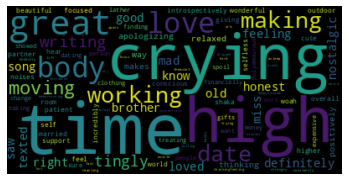

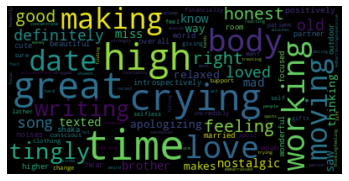

In [83]:
generate_wc(joined_clean_old_thc[0] + joined_clean_young_thc[0])

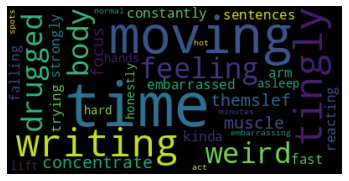

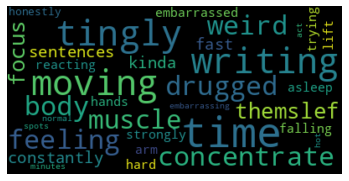

In [85]:
generate_wc(joined_clean_young_thc[0])

In [132]:
import pyLDAvis


In [133]:
pyLDAvis.enable_notebook()

In [135]:
vis = pyLDAvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)

NameError: name 'lda_model' is not defined

### Classifying

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [87]:
import numpy as np

In [88]:
vectorizer = TfidfVectorizer()

In [89]:
X = vectorizer.fit_transform(all_texts)

In [342]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.30, random_state=410)

In [344]:
from imblearn.over_sampling import RandomOverSampler 

In [345]:
rus = RandomOverSampler(random_state=413)

In [373]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [347]:
clf = svm.SVC(kernel='linear', probability=True,
                                 random_state=410)

In [348]:
clf.fit(X_res, y_res)

SVC(kernel='linear', probability=True, random_state=410)

In [349]:
predicted = clf.predict(X_test)

In [350]:
np.mean(predicted == y_test)

0.7083333333333334

In [351]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1])

In [352]:
y_score = clf.decision_function(X_test)

In [353]:
def plot_roc_auc(clf, y_test, y_score, n_classes = 2):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_score)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


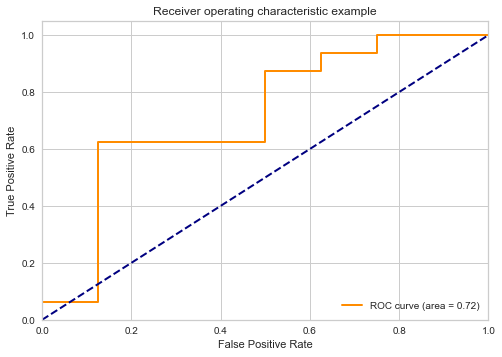

In [354]:
plot_roc_auc(clf, y_test, y_score)

In [378]:
clf = LogisticRegression().fit(X_res, y=y_res)

In [379]:
y_score = clf.decision_function(X_test)

In [380]:
np.mean(predicted == y_test)

0.625

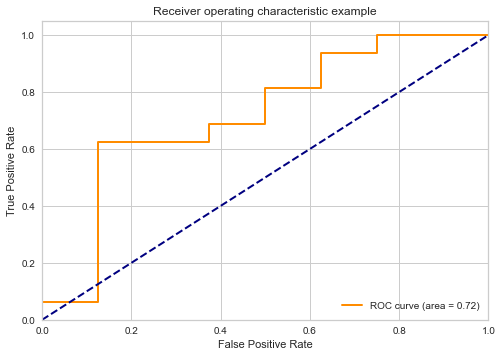

In [381]:
plot_roc_auc(clf, y_test, y_score)

### Visualising

In [336]:
from yellowbrick.text import TSNEVisualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


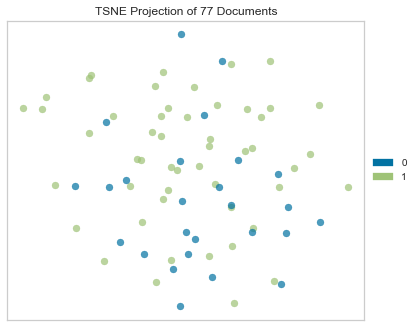

<AxesSubplot:title={'center':'TSNE Projection of 77 Documents'}>

In [46]:
tsne = TSNEVisualizer()
tsne.fit(X, labels)
tsne.show()

In [334]:
from yellowbrick.text import UMAPVisualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


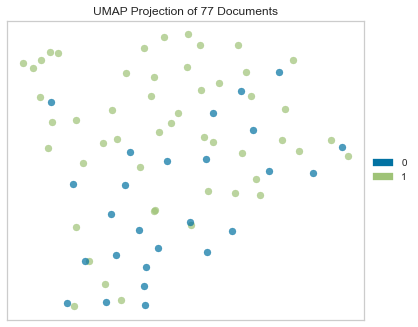

<AxesSubplot:title={'center':'UMAP Projection of 77 Documents'}>

In [48]:
umap = UMAPVisualizer()
umap.fit(X, labels)
umap.show()

TODO:

1) Averages + distribution plots 
2) Entropy measure
3) Try with only 15mg THC 
4) Try with adult/young
5) Important/discriminatory words in corpus
6) Visualisations
7) Dry Mouth / Bodily perception



Intuitions:

1) People talking about what their feelings - moods and feelings
2) Adjectives which people use for THC - adjective check list
3) Abstract vs Concrete words - Pennebacker Linguistic Analysis 

Classifier:

1) Would we able to classify these? (open question)


### word2vec and doc2vec

In [317]:
taggedDocs = []

In [318]:
i = 0

In [319]:
for text, label in zip(all_texts, labels):
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = text.split(' '), tags = [label]))
    i +=1


In [320]:
taggedDocs

[TaggedDocument(words=['crying', 'right', 'feeling', 'good', 'honest', 'definitely', 'high', 'crying', 'old', 'song', 'loved', 'nostalgic', 'crying', 'miss', 'brother', 'mad', 'saw', 'time', 'know', 'texted', 'apologizing', 'high', 'way', 'makes', 'body', 'relaxed', 'thinking', 'positively', 'introspectively', 'higher', 'noises', 'outdoor', 'focused', 'room', 'hear', 'world', 'woah', 'high', 'overall', 'great', 'love', 'married', 'beautiful', 'wonderful', 'partner', 'shaka', 'cute', 'great', 'incredibly', 'patient', 'selfless', 'giving', 'working', 'feel', 'self', 'conscious', 'having', 'support', 'financially', 'making', 'sure', 'working', 'change', 'love', 'clothing', 'want', 'lather', 'gifts', 'spoil', 'taking', 'dates', 'polyamourous', 'great', 'showed', 'work', 'finding', 'person', 'date', 'dating', 'expensive', 'treating', 'people', 'making', 'money', 'thinking'], tags=[1]),
 TaggedDocument(words=['sure', 'prompt', 'feelings', 'sensations', 'currently', 'find', 'hard', 'focus', '

In [321]:
doc2vec_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [322]:
doc2vec_model.build_vocab(taggedDocs)


In [323]:
doc2vec_model.train(taggedDocs, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [324]:
document_doc2vec = []

In [325]:
for text in all_texts:
    document_doc2vec.append(doc2vec_model.infer_vector(text.split(' ')))

In [355]:
X_train, X_test, y_train, y_test = train_test_split(document_doc2vec, labels, test_size=0.30, random_state=40)

In [356]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [367]:
from sklearn.linear_model import LogisticRegression

In [358]:
clf = svm.SVC(random_state=0).fit(X_res, y=y_res)

In [359]:
predicted = clf.predict(X_test)

In [365]:
np.mean(predicted == y_test)

0.875

In [332]:
y_test

[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]

In [362]:
y_score = clf.decision_function(X_test)

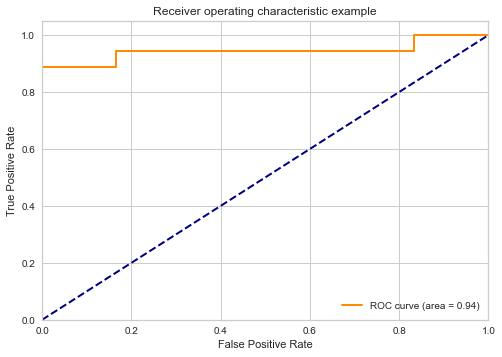

In [364]:
plot_roc_auc(clf, y_test, y_score)

In [368]:
clf = LogisticRegression().fit(X_res, y=y_res)

In [369]:
y_score = clf.decision_function(X_test)

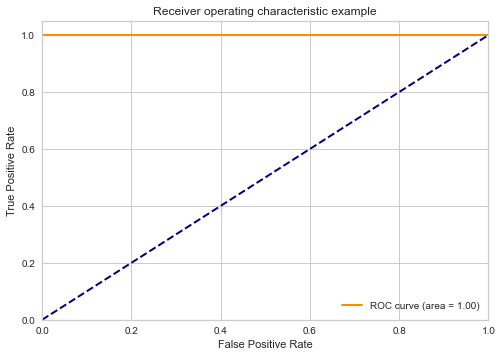

In [370]:
plot_roc_auc(clf, y_test, y_score)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


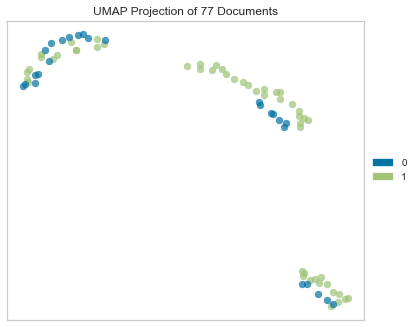

<AxesSubplot:title={'center':'UMAP Projection of 77 Documents'}>

In [339]:
umap = UMAPVisualizer()
umap.fit(document_doc2vec, labels)
umap.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


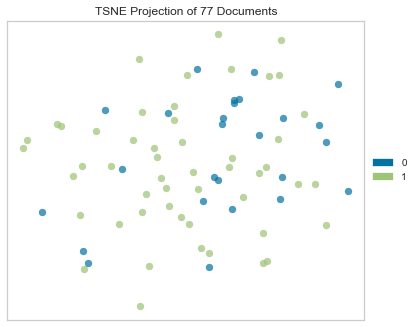

<AxesSubplot:title={'center':'TSNE Projection of 77 Documents'}>

In [337]:
tsne = TSNEVisualizer()
tsne.fit(X, labels)
tsne.show()

### Entropy and Perplexity

In [ ]:
sentences = []
sentence_labels = []

In [ ]:
all_raw = young_thc + old_thc + young_placebo + old_placebo


In [ ]:
i = 0

In [ ]:
thc = len(young_thc) + len(old_thc) - 1

In [ ]:
for text in all_raw:
    if i < thc:
        label = 1
    else:
        label = 0
    for sentence in text:
        sentences.append(sentence.replace("\n", "").replace("\\", "").replace("\'", "'"))
        sentence_labels.append(label)
    i += 1

In [ ]:
all_clean = clean_young_thc + clean_old_thc + clean_young_placebo + clean_old_placebo

In [ ]:
len(sentences), len(sentence_labels)

In [ ]:
from gensim.models import Word2Vec


In [ ]:
ny_address = "/Users/bhargavvader/Downloads/Academics_Tech/word2vec_pre_trained/nytimes_cbow.reduced.txt"

In [ ]:
google_address = "/Users/bhargavvader/Downloads/Academics_Tech/word2vec_pre_trained/GoogleNews-vectors-negative300.bin"

In [ ]:
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(google_address, binary=True)

In [ ]:
def sentence_entropy(sentence, model):
    sentence_word_vectors = []
    if len(sentence) >= 2:
        for word in sentence:
            try:
                sentence_word_vectors.append(model[word])
            except KeyError:
                continue
        distances = []
        for i in range(0, len(sentence_word_vectors) - 1):
            v = sentence_word_vectors[i+1]
            v_ = sentence_word_vectors[i]
            dist = np.dot(v, v_)/(np.linalg.norm(v)* np.linalg.norm(v_))
            distances.append(dist)
        mean_distance = np.mean(distances, axis=0)
        semantic_variability = 0
        for dist in distances:
            semantic_variability += np.square(dist - mean_distance)
        semantic_variability /= len(distances)
        return semantic_variability

In [ ]:
sentence_entropy("This is a sample sentence and we are writing a word in a sentence and story", w2v_model)

In [ ]:
sentence_entropy("cheese park dog random literature army country", w2v_model)

In [ ]:
import json

In [ ]:
json_file_path = "/Users/bhargavvader/open_source/comp-syn/vectors.json"

In [ ]:
with open(json_file_path, 'r') as j:
     content = json.loads(j.read())

In [ ]:
word_color_vector = {}

In [ ]:
for word in content:
    word_color_vector[word['query']] = word['jzazbz_dist']

In [ ]:
word_color_vector['body']

In [ ]:
import scipy

In [ ]:
def jensen_shannon(dist1, dist2):
    """
    Calculates Jensen-Shannon (JS) divergence between two distributions

    Args:
        dist1 (array): first distribution
        dist2 (array): second distribution

    Returns:
        js (float): JS divergence
    """
    dist1 = np.array(dist1)
    dist2 = np.array(dist2)

    mean_dist = (dist1 + dist2) / 2.0
    js = (
        scipy.stats.entropy(dist1, mean_dist) + scipy.stats.entropy(dist2, mean_dist)
    ) / 2.0
    return js

In [ ]:
missing_words = []

In [ ]:
def sentence_color_entropy(sentence, word_color_vector):
    sentence_word_vectors = []
    if len(sentence) >= 2:
        for word in sentence:
            try:
                sentence_word_vectors.append(word_color_vector[word])
            except KeyError:
                missing_words.append(word)
                continue
        distances = []
        for i in range(0, len(sentence_word_vectors) - 1):
            v = sentence_word_vectors[i+1]
            v_ = sentence_word_vectors[i]
            try:
                dist = jensen_shannon(v, v_)
                distances.append(dist)
            except TypeError:
                continue
        mean_distance = np.mean(distances, axis=0)
        semantic_variability = 0
        for dist in distances:
            semantic_variability += np.square(dist - mean_distance)
        semantic_variability /= len(distances)
        return semantic_variability

In [ ]:
from transformers import BertTokenizer,BertForMaskedLM

In [ ]:
import torch

In [ ]:
import math

In [ ]:
bertMaskedLM = BertForMaskedLM.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def get_score(sentence, model, tokenizer):
    tokenize_input = tokenizer.tokenize(sentence)
    tensor_input = torch.tensor([tokenizer.convert_tokens_to_ids(tokenize_input)])
    predictions = model(tensor_input)
    # print(predictions[0])
    # sentence_embedding, word_embedding = predictions[0], predictions[1]
    loss_fct = torch.nn.CrossEntropyLoss()
    loss = loss_fct(predictions[0].squeeze(),tensor_input.squeeze()).data 
    return math.exp(loss)

In [ ]:
get_score(sentences[0], bertMaskedLM, tokenizer)

In [ ]:
sentence_scores_BERT = []

In [ ]:
for sentence in sentences:
    try:
        sentence_scores_BERT.append(get_score(sentence, bertMaskedLM, tokenizer))
    except IndexError:
        continue
    except RuntimeError:
        continue

In [ ]:
sentence_entropys = []

In [ ]:
for sentence in all_clean:
    sentence_entropys.append(sentence_entropy(sentence, w2v_model))

In [ ]:
sentence_color_entropys = []

In [ ]:
for sentence in all_clean:
    sentence_color_entropys.append(sentence_color_entropy(sentence, word_color_vector))

In [ ]:
sentences[0:10]

In [ ]:
sentence_labels[0:10]

In [ ]:
sentence_scores_BERT[0:10]

In [ ]:
sentence_labels[-155:]

In [ ]:
sentence_labels[:453], sentence_labels[-154:]

In [ ]:
np.mean(sentence_scores_BERT[:453]), np.mean(sentence_scores_BERT[-154:])

In [ ]:
# signal!!

In [ ]:
np.mean(sentence_entropys[0:51]), np.mean(sentence_entropys[52:77])

In [ ]:
np.mean(sentence_color_entropys[0:51]), np.mean(sentence_color_entropys[52:77])

In [ ]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast


In [ ]:
model_id = 'gpt2-large'
gpt_model = GPT2LMHeadModel.from_pretrained(model_id)
gpt_tokenizer = GPT2Tokeniz erFast.from_pretrained(model_id)

In [ ]:
from tqdm import tqdm

In [ ]:
def gpt_ppl_score(sentence, model, tokenizer, stride=512):
    encodings = tokenizer(sentence, return_tensors='pt')
#     encodings = torch.tensor([tokenizer.convert_tokens_to_ids(tokenize_input)])
    max_length = model.config.n_positions
    lls = []
    for i in tqdm(range(0, encodings.input_ids.size(1), stride)):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, encodings.input_ids.size(1))
        trg_len = end_loc - i    # may be different from stride on last loop
        input_ids = encodings.input_ids[:,begin_loc:end_loc]
        target_ids = input_ids.clone()
        target_ids[:,:-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            log_likelihood = outputs[0] * trg_len

        lls.append(log_likelihood)

    ppl = torch.exp(torch.stack(lls).sum() / end_loc)
    return ppl

In [ ]:
# gpt_ppl_score("Hi how's it going?", gpt_model, gpt_tokenizer)

## Age and Dose

In [ ]:
def avg_measures(raw_texts, cleaned_words):
    sentence_scores_BERT = []
    sentence_entropys = []
    sentence_color_entropys = []
    
    sentences = []
    
    for text in raw_texts:
        for line in text:
            sentences.append(line)
        
    for sentence in sentences:
        try:
            sentence_scores_BERT.append(get_score(sentence, bertMaskedLM, tokenizer))
        except IndexError:
            continue
        except RuntimeError:
            continue
    
    for sentence in cleaned_words:
        sentence_entropys.append(sentence_entropy(sentence, w2v_model))
        
    for sentence in cleaned_words:
        sentence_color_entropys.append(sentence_color_entropy(sentence, word_color_vector))
    
    return np.mean(sentence_scores_BERT), np.mean(sentence_entropys), np.mean(sentence_color_entropys)

In [ ]:
sentence_score_young_7_5, sentence_entropys_young_7_5, sentence_entropys_color_young_7_5 = avg_measures(young_7_5, clean_young_7_5)

In [ ]:
sentence_score_young_7_5, sentence_entropys_young_7_5, sentence_entropys_color_young_7_5

In [ ]:
sentence_score_young_15, sentence_entropys_young_15, sentence_entropys_color_young_15 = avg_measures(young_15, clean_young_15)

In [ ]:
sentence_score_young_15, sentence_entropys_young_15, sentence_entropys_color_young_15

In [ ]:
sentence_score_old_7_5, sentence_entropys_old_7_5, sentence_entropys_color_old_7_5 = avg_measures(old_7_5, clean_old_7_5)

In [ ]:
sentence_score_old_7_5, sentence_entropys_old_7_5, sentence_entropys_color_old_7_5

In [ ]:
sentence_score_old_15, sentence_entropys_old_15, sentence_entropys_color_old_15 = avg_measures(old_15, clean_old_15)

In [ ]:
sentence_score_old_15, sentence_entropys_old_15, sentence_entropys_color_old_15

In [ ]:
sentence_score_7_5, sentence_entropys_7_5, sentence_entropys_color_7_5 = avg_measures(young_7_5 + old_7_5, clean_young_7_5 + clean_old_7_5)

In [ ]:
sentence_score_7_5, sentence_entropys_7_5, sentence_entropys_color_7_5

In [ ]:
sentence_score_15, sentence_entropys_15, sentence_entropys_color_15 = avg_measures(young_15 + old_15, clean_young_15 + clean_old_15)

In [ ]:
sentence_score_15, sentence_entropys_15, sentence_entropys_color_15

## Data Consolidation



In [ ]:
data_dict = {}

In [ ]:
for study in study_data: 
    name, rest = study.split(".", 1)
    other, amount = rest.split("_")
    texts = study_data[study]
    cleaned = clean_texts(texts)
    color_score = sentence_color_entropy(cleaned, word_color_vector)
    semantic_score = sentence_entropy(cleaned, w2v_model)
    sentence_scores = []
    for sentence in texts:
        try:
            sentence_scores.append(get_score(sentence, bertMaskedLM, tokenizer))
        except IndexError:
            continue
        except RuntimeError:
            continue
    avg_sentence_score = np.mean(sentence_scores)
    data_dict[study] = [name, amount, texts, cleaned, semantic_score, color_score, avg_sentence_score]

In [ ]:
import pandas as pd

In [ ]:
study_df = pd.DataFrame.from_dict(data_dict, orient='index')

In [ ]:
study_df.columns = ['Name', 'Dose', 'Raw Texts', 'Cleaned Texts', 'Semantic Entropy', 'Color Entropy', 'Average Sentence Perplexity']

In [ ]:
study_df

In [ ]:
study_df.to_csv("thc_study_data.csv")